In [2]:
# 1) Data Preprocessing - Code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
 
%matplotlib inline
sns.set(style='whitegrid')
 
 

 
dataset = pd.read_csv('50_Startups.csv')
print('Dataset shape:', dataset.shape)
display(dataset.head())
 
# Separate features and target
X = dataset.iloc[:, :-1].values  # all columns except last (Profit)
y = dataset.iloc[:, -1].values   # last column (Profit)
 
print('\nFeature preview (first 5 rows):')
print(X[:5])
 
# Encode categorical 'State' column (index 3)
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X_encoded = ct.fit_transform(X)
 
# Convert to numpy array and inspect
X = np.array(X_encoded)
print('\nAfter OneHotEncoding, feature shape:', X.shape)
print('\nFirst 5 rows after encoding:')
print(X[:5])

Dataset shape: (50, 5)


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94



Feature preview (first 5 rows):
[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']]

After OneHotEncoding, feature shape: (50, 6)

First 5 rows after encoding:
[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]]


In [3]:
# 2) Fit Model - Code
# Splitting into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
 
print('Training samples:', X_train.shape[0])
print('Test samples:', X_test.shape[0])
 
# Train the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
 
print('Intercept:', regressor.intercept_)
print('Number of coefficients:', len(regressor.coef_))
 

Training samples: 40
Test samples: 10
Intercept: 42467.5292485298
Number of coefficients: 6


In [4]:
# 3) Predict - Code
# Predicting Test set results
y_pred = regressor.predict(X_test)
 
# Compare Actual vs Predicted
comparison = pd.DataFrame({
    'Actual Profit': y_test,
    'Predicted Profit': np.round(y_pred,2)
})
display(comparison.reset_index(drop=True))

,Actual Profit,Predicted Profit
0,103282.38,103015.20
1,144259.40,132582.28
2,146121.95,132447.74
3,77798.83,71976.10
4,191050.39,178537.48
5,105008.31,116161.24
6,81229.06,67851.69
7,97483.56,98791.73
8,110352.25,113969.44
9,166187.94,167921.07


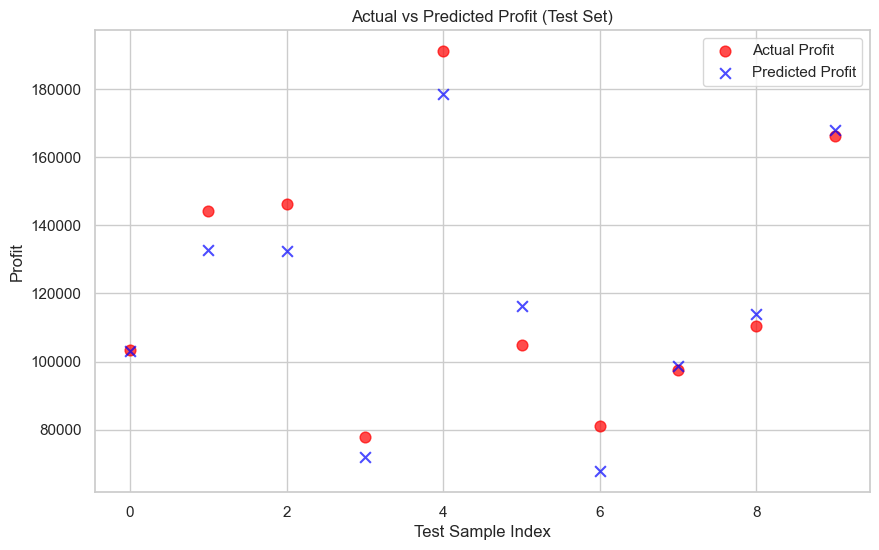

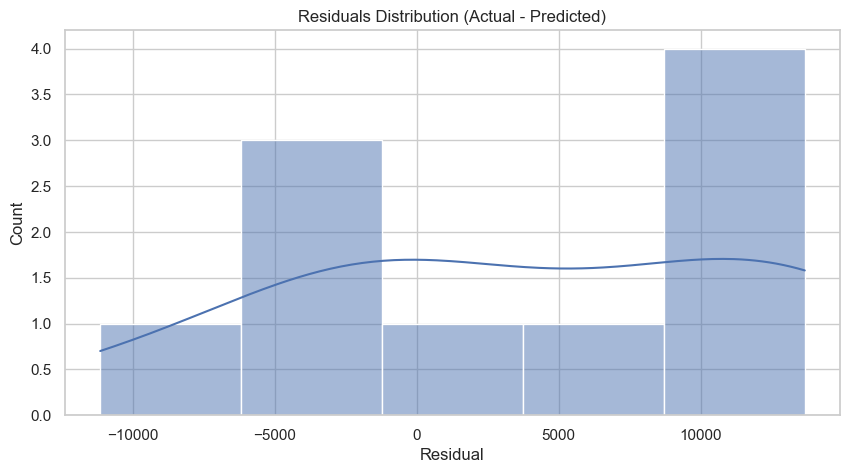

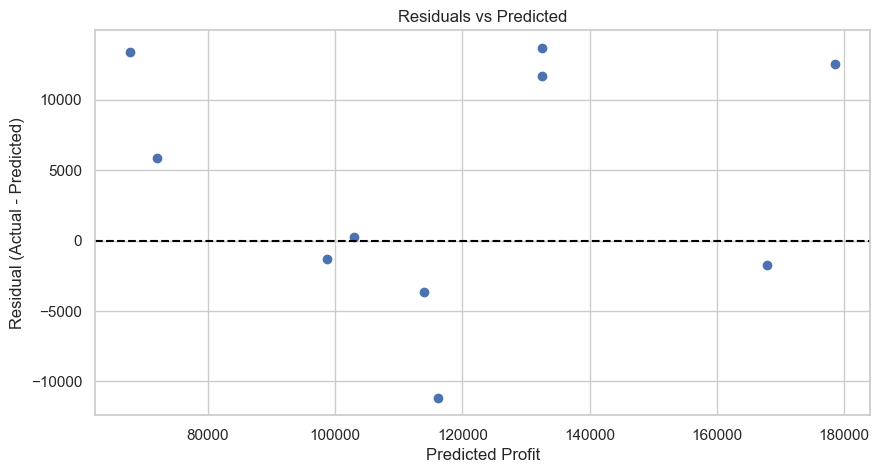

In [5]:
# 4) Visualization - Code
# Visualization: Actual vs Predicted profits (scatter)
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual Profit', alpha=0.7, s=60)
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted Profit', alpha=0.7, marker='x', s=60)
plt.title('Actual vs Predicted Profit (Test Set)')
plt.xlabel('Test Sample Index')
plt.ylabel('Profit')
plt.legend()
plt.show()
 
# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10,5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution (Actual - Predicted)')
plt.xlabel('Residual')
plt.show()
 
# Residuals vs Predicted (to check heteroscedasticity)
plt.figure(figsize=(10,5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Profit')
plt.ylabel('Residual (Actual - Predicted)')
plt.show()
 

In [6]:
# Evaluation metrics & sample prediction
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 
mse = mean_squared_error(y_test, y_pred)
 
r2 = r2_score(y_test, y_pred)
 
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R^2 Score: {r2:.4f}')
 
# Sample prediction: build raw sample and encode using ct (same transformer used earlier)
raw_sample = np.array([[160000, 130000, 300000, 'California']])
encoded_sample = ct.transform(raw_sample)
encoded_sample = np.array(encoded_sample, dtype=float)
pred_sample = regressor.predict(encoded_sample)
print('\nSample startup predicted profit:', float(pred_sample[0]))

Mean Squared Error (MSE): 83502864.03
R^2 Score: 0.9347

Sample startup predicted profit: 181566.92389383633


#### FOR ADVERTISING DATSET

In [3]:
import pandas as pd
df=pd.read_csv("advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X,y

(array([[230.1,  37.8,  69.2],
        [ 44.5,  39.3,  45.1],
        [ 17.2,  45.9,  69.3],
        [151.5,  41.3,  58.5],
        [180.8,  10.8,  58.4],
        [  8.7,  48.9,  75. ],
        [ 57.5,  32.8,  23.5],
        [120.2,  19.6,  11.6],
        [  8.6,   2.1,   1. ],
        [199.8,   2.6,  21.2],
        [ 66.1,   5.8,  24.2],
        [214.7,  24. ,   4. ],
        [ 23.8,  35.1,  65.9],
        [ 97.5,   7.6,   7.2],
        [204.1,  32.9,  46. ],
        [195.4,  47.7,  52.9],
        [ 67.8,  36.6, 114. ],
        [281.4,  39.6,  55.8],
        [ 69.2,  20.5,  18.3],
        [147.3,  23.9,  19.1],
        [218.4,  27.7,  53.4],
        [237.4,   5.1,  23.5],
        [ 13.2,  15.9,  49.6],
        [228.3,  16.9,  26.2],
        [ 62.3,  12.6,  18.3],
        [262.9,   3.5,  19.5],
        [142.9,  29.3,  12.6],
        [240.1,  16.7,  22.9],
        [248.8,  27.1,  22.9],
        [ 70.6,  16. ,  40.8],
        [292.9,  28.3,  43.2],
        [112.9,  17.4,  38.6],
        

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('Training samples:', X_train.shape[0])
print('Test samples:', X_test.shape[0])

Training samples: 160
Test samples: 40


In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print('Intercept:', regressor.intercept_)
print('Number of coefficients:', len(regressor.coef_))
y_pred = regressor.predict(X_test)

Intercept: 4.7732052032698284
Number of coefficients: 3


In [12]:
import numpy as np
comparison = pd.DataFrame({
    'Actual Sales': y_test,
    'Predicted Sales': np.round(y_pred,2)
})
comparison

,Actual Sales,Predicted Sales
0,11.3,10.71
1,8.4,8.69
2,12.0,9.58
3,25.4,24.86
4,16.7,14.66
5,8.7,8.32
6,7.2,10.43
7,18.2,18.45
8,9.2,9.73
9,16.6,17.93


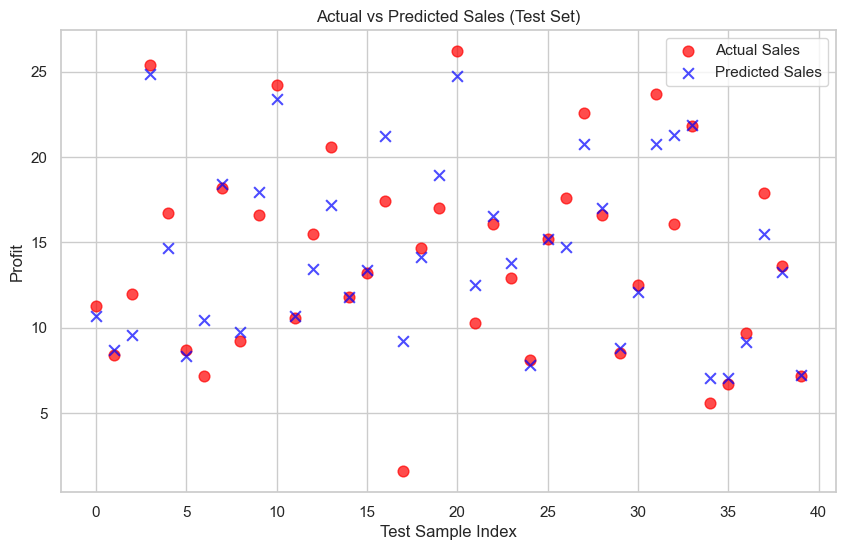

In [13]:
# Visualization: Actual vs Predicted profits (scatter)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual Sales', alpha=0.7, s=60)
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted Sales', alpha=0.7, marker='x', s=60)
plt.title('Actual vs Predicted Sales (Test Set)')
plt.xlabel('Test Sample Index')
plt.ylabel('Profit')
plt.legend()
plt.show()

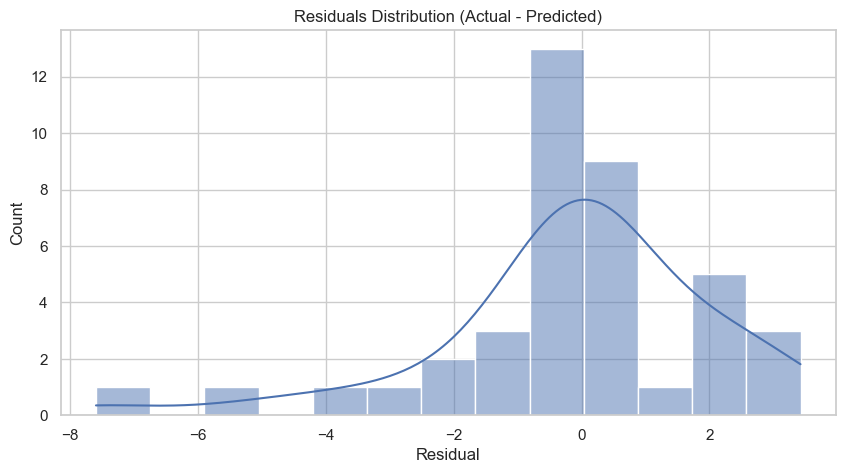

In [14]:
# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10,5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution (Actual - Predicted)')
plt.xlabel('Residual')
plt.show()

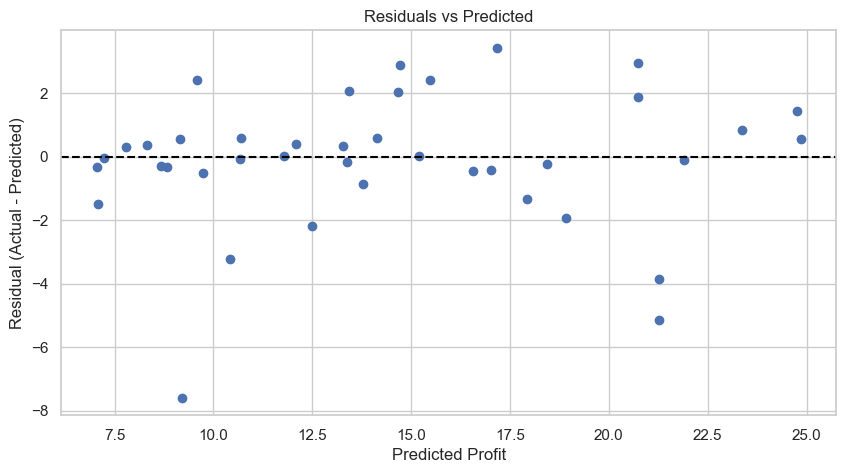

In [15]:
# Residuals vs Predicted (to check heteroscedasticity)
plt.figure(figsize=(10,5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Profit')
plt.ylabel('Residual (Actual - Predicted)')
plt.show()

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R^2 Score: {r2:.4f}')

Mean Squared Error (MSE): 4.52
R^2 Score: 0.8645


### Insurance dataset

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [6]:
# Load dataset
df = pd.read_csv("insurance.csv")

# View first rows
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# Target variable
target = "charges"

# Input features
X = df.drop(columns=target)
y = df[target]


In [8]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

print("Numeric Columns:", numeric_cols.tolist())
print("Categorical Columns:", categorical_cols.tolist())


Numeric Columns: ['age', 'bmi', 'children', 'charges']
Categorical Columns: ['sex', 'smoker', 'region']


In [9]:
# Missing values
df.isnull().sum()
# Duplicates
df.duplicated().sum()
# Statistical summary
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df["sex"] = df["sex"].map({"male": 1, "female": 0})
df["smoker"] = df["smoker"].map({"yes": 1, "no": 0})
df = pd.get_dummies(df, columns=["region"], drop_first=True)


In [11]:
df.head()


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


In [12]:
X = df.drop(columns="charges")
y = df["charges"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()


,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,-0.566418,-0.611324,1.765481
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,-0.566418,1.635795,-0.566418
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,-0.566418,1.635795,-0.566418
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,1.765481,-0.611324,-0.566418
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,1.765481,-0.611324,-0.566418


In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))



R2 Score: 0.7835929767120722
RMSE: 5796.284659276274


In [14]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

coefficients


,Feature,Coefficient
4,smoker,9544.251089
0,age,3609.149018
2,bmi,2054.885063
3,children,512.478869
1,sex,-9.295337
5,region_northwest,-158.959435
6,region_southeast,-292.759080
7,region_southwest,-347.270359


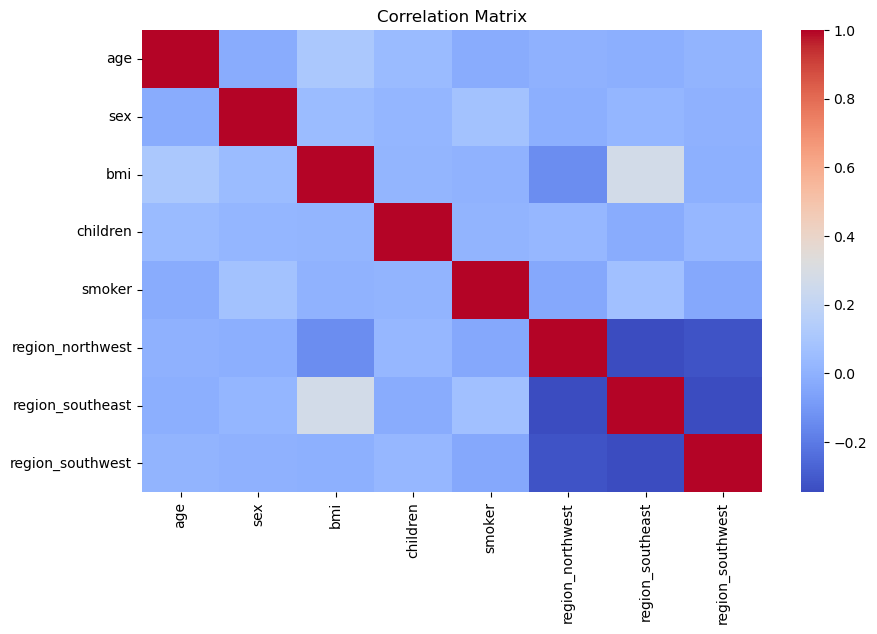

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(X.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [16]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_scaled.values, i)
    for i in range(X_scaled.shape[1])
]

vif_data.sort_values(by="VIF", ascending=False)


,Feature,VIF
6,region_southeast,1.652230
7,region_southwest,1.529411
5,region_northwest,1.518823
2,bmi,1.106630
0,age,1.016822
4,smoker,1.012074
1,sex,1.008900
3,children,1.004011


In [17]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)

print("Ridge R2 Score:", r2_score(y_test, ridge_pred))


Ridge R2 Score: 0.7835411843918458


In [18]:
summary = pd.DataFrame({
    "Feature": X.columns,
    "Linear_Coefficient": model.coef_,
    "Ridge_Coefficient": ridge.coef_
})

summary


,Feature,Linear_Coefficient,Ridge_Coefficient
0,age,3609.149018,3605.550631
1,sex,-9.295337,-8.619161
2,bmi,2054.885063,2052.961260
3,children,512.478869,512.358230
4,smoker,9544.251089,9535.086692
5,region_northwest,-158.959435,-158.444622
6,region_southeast,-292.759080,-291.115771
7,region_southwest,-347.270359,-346.429567


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.7835929767120722
RMSE: 5796.284659276274
